## 📌 Notebook 1: Logistic Regression (Binary Classification)

### Handwritten Digit Recognition with Logistic Regression

This notebook introduces the first step in our learning journey: a linear binary classifier. We build **logistic regression from scratch** using PyTorch tensors to distinguish between two MNIST digits (e.g. 0 vs 1).

**Key Goals**
- Implement weights, bias, and sigmoid activation manually
- Train using binary cross-entropy loss and gradient descent
- Track training and validation accuracy and loss
- Evaluate the model using a confusion matrix

**Expected Takeaway**  
Gain a foundational understanding of how gradient-based learning works on a simple binary task.


### Loading our data 
 We will use MNIST Dataset

In [19]:
import os
import sys
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)
sys.path.append(project_root)
import importlib
import src.plots 
import src.utils
importlib.reload(src.plots)



<module 'src.plots' from '/Users/mac/Studying/Machine learning/Digit_recognition_evolution/project/src/plots.py'>

In [13]:

from src.utils import load_transform_split_mnist , count_classes , check_device
from src.plots import  show_samples

train_loader,val_loader,test_loader , train_size,val_size, test_size = load_transform_split_mnist()

**let's show some samples**

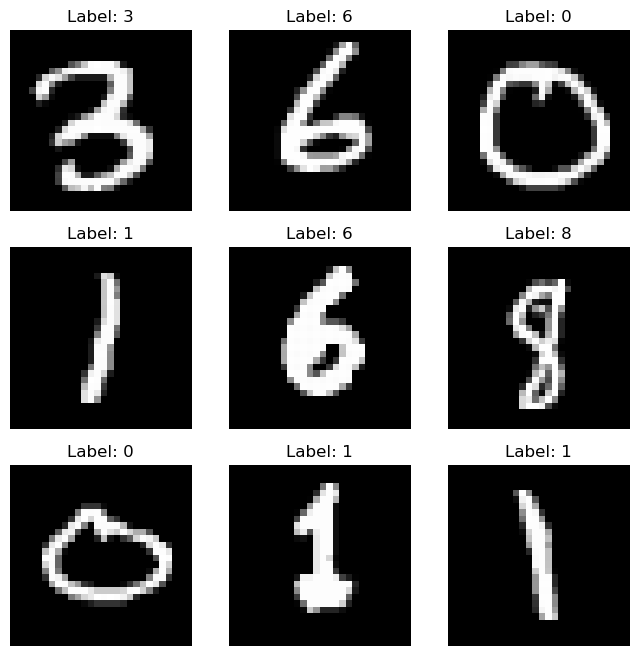

In [14]:
importlib.reload(src.plots)
show_samples(train_loader)

**checking balance**

In [31]:
# first we check on our device for function necessties
check_device()

from importlib import reload
import src.utils as utils

reload(utils)

counts = utils.count_classes(train_loader)
counts = {int(k): v for k, v in counts.items()}
print(counts)


Using Apple Silicon MPS GPU
Device: mps
{1: 5394, 3: 4905, 6: 4734, 8: 4681, 5: 4337, 7: 5012, 0: 4738, 4: 4674, 9: 4759, 2: 4766}
